In [6]:
#imports

# Scikit-learn module for PCA
from sklearn import decomposition

# Custom csv processor for importing data from csv
import utility.csv_process as reader

# Numpy for matrix manipulation
import numpy as np

# For 2d graphing
from matplotlib import pyplot as plt

# For 3d graphing
from mpl_toolkits.mplot3d import Axes3D

# For building paths
from os import path


In [9]:
#read csvs

rw_1 = reader.production_read(path.join('data', 'log_gait_1_RW.csv'))
vr_1 = reader.production_read(path.join('data', 'log_gait_1_VR.csv'))
rw_2 = reader.production_read(path.join('data', 'log_gait_2_RW.csv'))
vr_2 = reader.production_read(path.join('data', 'log_gait_2_RW.csv'))


In [19]:
#This organizes each dataset by frame 
#Also creates numpy arrays of flaots

trans_cui = np.array(reader.by_frame(cui), dtype = 'float16')
trans_liu = np.array(reader.by_frame(liu), dtype = 'float16')
trans_tri = np.array(reader.by_frame(tri), dtype = 'float16')

In [20]:
#get the shapes of the separate datasets

print('cui:', trans_cui.shape, 'liu:', trans_liu.shape, 'tri:', trans_tri.shape)

cui: (695, 80) liu: (2177, 80) tri: (298, 80)


In [21]:
#stack our datasets: 

data = np.vstack((trans_cui, trans_liu, trans_tri))
data.shape

(3170, 80)

In [7]:
#Do pca on the combined dataset - we will go down to 3 components
pca = decomposition.PCA(n_components=3)

components = pca.fit_transform(data)

In [8]:
#split the dataset back into classes

comp_cui = components[0:695]
comp_liu = components[695:2177+695]
comp_tri = components[2177+695:2177+695+298]
print('cui:', comp_cui.shape, 'liu:', comp_liu.shape, 'tri:', comp_tri.shape)

cui: (695, 3) liu: (2177, 3) tri: (298, 3)


In [9]:
#split data into x,y,z components
comp_cui_x = comp_cui[:, 0]
comp_cui_y = comp_cui[:, 1]
comp_cui_z = comp_cui[:, 2]

comp_liu_x = comp_liu[:, 0]
comp_liu_y = comp_liu[:, 1]
comp_liu_z = comp_liu[:, 2]

comp_tri_x = comp_tri[:, 0]
comp_tri_y = comp_tri[:, 1]
comp_tri_z = comp_tri[:, 2]

In [10]:
#Make the plot so we can graph

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


c:\users\bobth\documents\college\summer17\ml\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


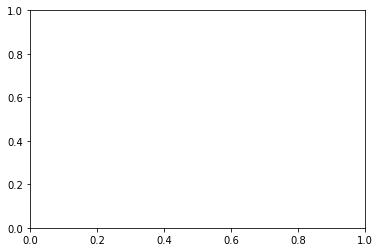

In [12]:
#add each dataset to the plot and then graph
ax.scatter(comp_cui_x, comp_cui_y, comp_cui_z, c='r', marker = "o", label = 'Cui')
ax.scatter(comp_liu_x, comp_liu_y, comp_liu_z, c='b', marker = "^", label = 'Liu')
ax.scatter(comp_tri_x, comp_tri_y, comp_tri_z, c='g', marker = "x", label = 'Tri')

plt.legend(loc = 'best'); 
plt.show()

In [29]:
#Do pca on the combined dataset - we will go down to 2 components here
pca = decomposition.PCA(n_components=2)

components = pca.fit_transform(data)

In [30]:
#Make the plot so we can graph

fig = plt.figure()
ax = fig.add_subplot(111)


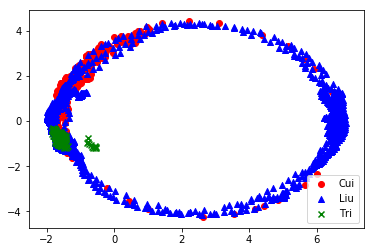

In [31]:
#add each dataset to the plot and then graph
ax.scatter(comp_cui_x, comp_cui_y, c='r', marker = "o", label = 'Cui')
ax.scatter(comp_liu_x, comp_liu_y, c='b', marker = "^", label = 'Liu')
ax.scatter(comp_tri_x, comp_tri_y, c='g', marker = "x", label = 'Tri')

plt.legend(loc = 'best'); 
plt.show()

In [25]:
comp_cui_x = comp_cui[:, 0]
comp_cui_y = comp_cui[:, 1]

comp_liu_x = comp_liu[:, 0]
comp_liu_y = comp_liu[:, 1]

comp_tri_x = comp_tri[:, 0]
comp_tri_y = comp_tri[:, 1]
